# Decision Tree

### 1.	Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  
 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# Convert 'Sales' into categorical variable
df['Sales_Category'] = pd.cut(df['Sales'], bins=[0, 5, 10, float('inf')], labels=['Low', 'Medium', 'High'])

In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Split data into train and test sets
X = df.drop(['Sales', 'Sales_Category'], axis=1)
y = df['Sales_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

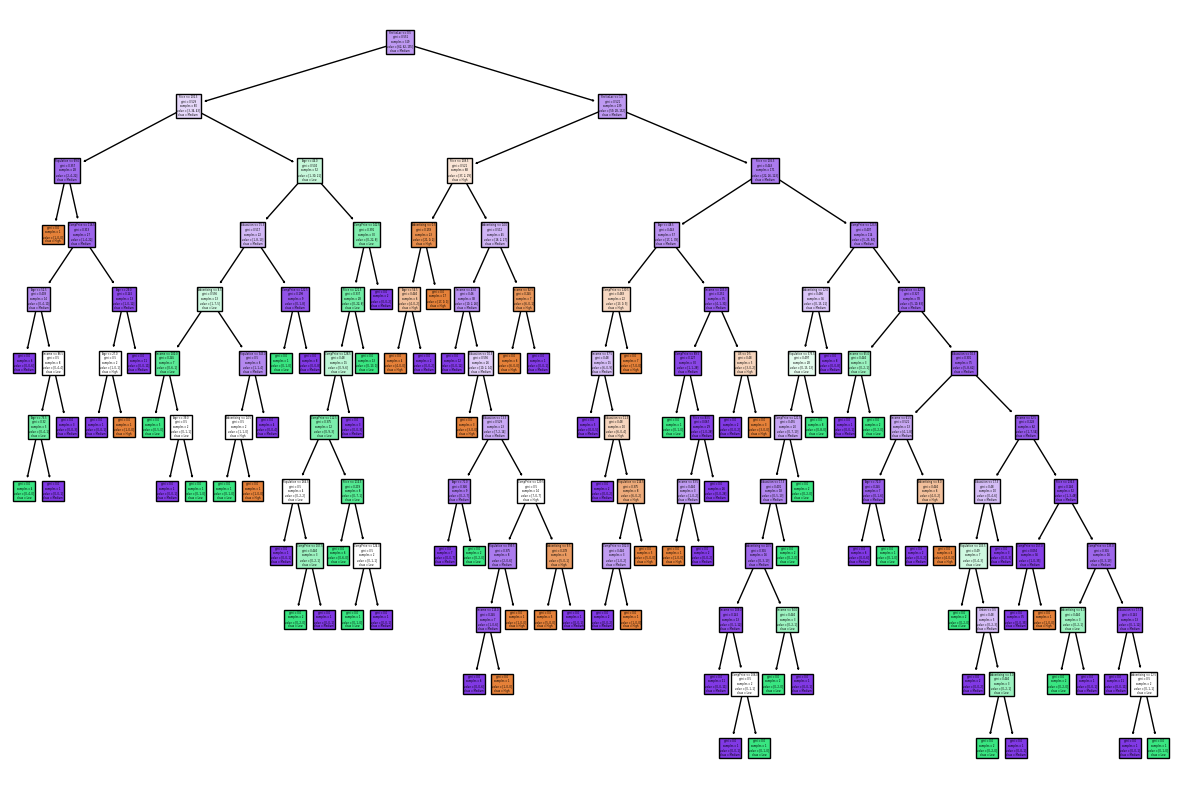

In [8]:
# Visualize decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns.tolist(), class_names=model.classes_.tolist(), filled=True)
plt.show()

In [9]:
# Analyze feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(feature_importances)

       Feature  Importance
0    CompPrice    0.168642
1       Income    0.134609
2  Advertising    0.122956
3   Population    0.083388
4        Price    0.132428
5    ShelveLoc    0.126297
6          Age    0.128285
7    Education    0.083665
8        Urban    0.006071
9           US    0.013660


### 2.	Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :
Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [11]:
# Load the data
df = pd.read_csv("C:\\Users\\SHUBHAM GARKAL\\Downloads\\Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [12]:
# Convert 'Undergrad' and 'Urban' columns to binary values
df['Undergrad'] = df['Undergrad'].map({'YES': 1, 'NO': 0})
df['Urban'] = df['Urban'].map({'YES': 1, 'NO': 0})

In [13]:
# Encode 'Marital.Status' column using one-hot encoding
df = pd.get_dummies(df, columns=['Marital.Status'])

In [14]:
# Define the target variable and features
X = df.drop('Taxable.Income', axis=1)
y = df['Taxable.Income']

In [15]:
# Convert taxable_income <= 30000 as "Risky" and others are "Good"
y = ['Risky' if i <= 30000 else 'Good' for i in y]

In [16]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[76 18]
 [22  4]]
Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.81      0.79        94
       Risky       0.18      0.15      0.17        26

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120

